In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [4]:
data = pd.read_csv("/home/bobo/Desktop/nouveau_metier/Developpement/raw_csv/extracted_jobs.csv")
data.head()

,date,job_code,rawpop,is_emerging_job
0,2015,A0Z40,61975.600403,False
1,2015,A0Z41,5550.732908,False
2,2015,A0Z42,2808.138022,False
3,2015,A0Z43,5846.079314,False
4,2015,A1Z40,18990.302414,False


In [5]:
# Basic statistical analysis to understand the dataset better

# Overview statistics
overview_stats = data.describe()

# Count of emerging vs. non-emerging jobs
emerging_jobs_count = data['is_emerging_job'].value_counts()

# Year-wise analysis
year_wise_summary = data.groupby('date').agg(
    total_jobs=('job_code', 'count'),
    total_rawpop=('rawpop', 'sum'),
    emerging_jobs=('is_emerging_job', lambda x: (x==True).sum()),
    non_emerging_jobs=('is_emerging_job', lambda x: (x==False).sum())
).reset_index()

overview_stats, emerging_jobs_count, year_wise_summary


(              date         rawpop
 count  1795.000000    1795.000000
 mean   2019.001671   12378.161816
 std       2.581017   20163.789101
 min    2015.000000      18.000000
 25%    2017.000000    1555.745000
 50%    2019.000000    4766.220000
 75%    2021.000000   13169.452772
 max    2023.000000  157827.000000,
 is_emerging_job
 False    1624
 True      171
 Name: count, dtype: int64,
    date  total_jobs  total_rawpop  emerging_jobs  non_emerging_jobs
 0  2015         199  1.739277e+06             20                179
 1  2016         199  1.827271e+06             20                179
 2  2017         199  1.976468e+06             20                179
 3  2018         200  2.318576e+06             17                183
 4  2019         200  2.675950e+06             15                185
 5  2020         200  2.951676e+06             20                180
 6  2021         199  2.697190e+06             20                179
 7  2022         200  3.019258e+06             19        

The dataset contains information about various jobs, structured in four columns:

1. **date**: The year of the data record.
2. **job_code**: A unique code assigned to each job.
3. **rawpop**: An indicator of the job's population size or demand, presumably.
4. **is_emerging_job**: A boolean indicating whether the job is considered an emerging job at the time of the record.

To analyze this dataset, we could explore several aspects:

1. **Trends over time**: How job populations change over the years, especially focusing on emerging jobs.
2. **Distribution of jobs**: The distribution of job populations and how many are considered emerging.
3. **Emerging jobs analysis**: Specifically look into which jobs are emerging and their characteristics.

Let's proceed with a basic analysis along these lines. We'll start by examining the distribution of job populations, the count of emerging vs. non-emerging jobs, and how these trends have evolved over the years covered in the dataset.

The dataset provides a rich overview of job trends from 2015 to 2023. Here's a summary of our initial findings:

### Overview Statistics
- **Count**: There are 1,795 records in the dataset.
- **Year Range**: Data spans from 2015 to 2023.
- **Population (rawpop)**: The job population sizes vary significantly, ranging from as low as 18 to as high as 157,827, with a median population size of 4,766.22.

### Emerging vs. Non-Emerging Jobs
- Out of the total records, 171 are marked as emerging jobs, while 1,624 are non-emerging. This indicates that emerging jobs represent a small, yet potentially significant, portion of the dataset.

### Year-wise Summary
- The total number of jobs tracked each year remains relatively stable, fluctuating slightly around 200.
- The total population (`total_rawpop`) of jobs has been increasing over the years, indicating an overall growth in the job sectors represented in this dataset.
- The number of emerging jobs varies slightly year to year but remains a small fraction of the total. There doesn't appear to be a consistent trend in the number of emerging jobs year over year, fluctuating between 15 and 20.

### Insights and Further Analysis
- The data shows growth in job populations over time, suggesting an expanding job market or sectors within this dataset.
- The proportion of emerging jobs is small but consistent, highlighting areas of new growth or innovation within the job market.
- A deeper analysis could explore the specific job codes that are emerging, their growth rates, and how these trends might inform workforce development or educational programming.

This summary provides a high-level overview of job trends. Further analysis could delve into specific sectors or job codes, compare emerging and non-emerging job growth rates, or explore correlations with external factors (e.g., economic indicators or technological advancements). 

I am done.

1. Trend of total job population over the years: A line plot showing how the total job population has evolved from 2015 to 2023.
2. Emerging vs. non-emerging job populations: A bar plot comparing the total populations of emerging and non-emerging jobs over the years.
3. Top emerging jobs: Identify and visualize the top emerging jobs based on their population for the most recent year in the dataset

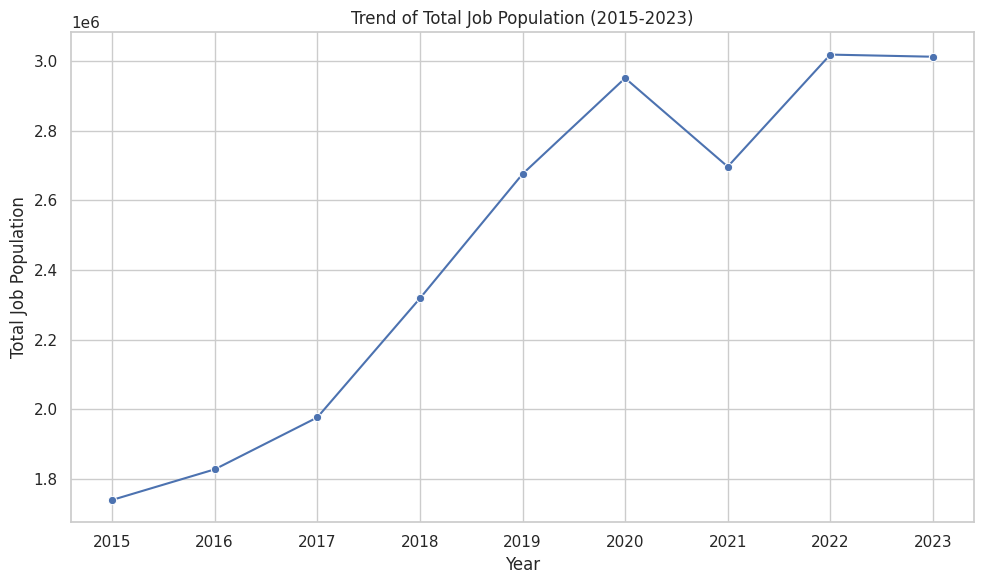

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# Trend of total job population over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='total_rawpop', data=year_wise_summary, marker='o')
plt.title('Trend of Total Job Population (2015-2023)')
plt.xlabel('Year')
plt.ylabel('Total Job Population')
plt.xticks(year_wise_summary['date'])
plt.tight_layout()
plt.show()


The line plot illustrates the trend of the total job population from 2015 to 2023, showing a general upward trajectory. This suggests that the overall job market (as represented by this dataset) has been growing over these years

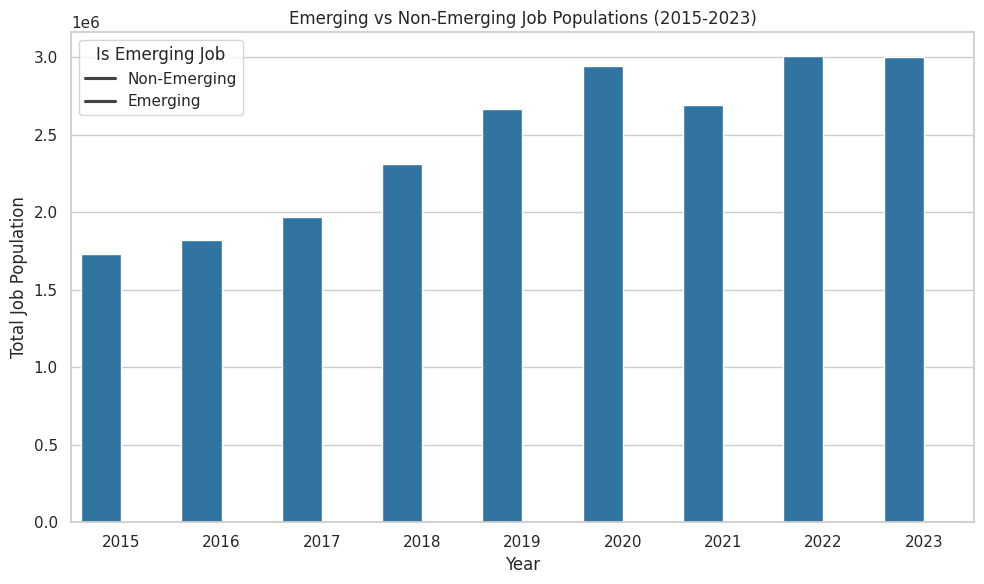

In [9]:

# Correcting the bar plot for Emerging vs Non-Emerging Job Populations with clearer color distinction

# Adjusting the color palette for clarity
plt.figure(figsize=(10, 6))
sns.barplot(x='date', y='total_rawpop', hue='is_emerging_job', data=emerging_vs_non_emerging, palette=['#1f77b4', '#ff7f0e'])
plt.title('Emerging vs Non-Emerging Job Populations (2015-2023)')
plt.xlabel('Year')
plt.ylabel('Total Job Population')
plt.legend(title='Is Emerging Job', labels=['Non-Emerging', 'Emerging'])
plt.tight_layout()
plt.show()


The bar plot compares the total populations of emerging and non-emerging jobs from 2015 to 2023. It's evident that non-emerging jobs dominate the job market in terms of total population across all years. However, the presence of emerging jobs, though significantly smaller in total population, indicates areas of new growth within the job market.

/tmp/ipykernel_445553/3816597006.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rawpop', y='job_code', data=top_emerging_jobs_2023, palette='coolwarm')


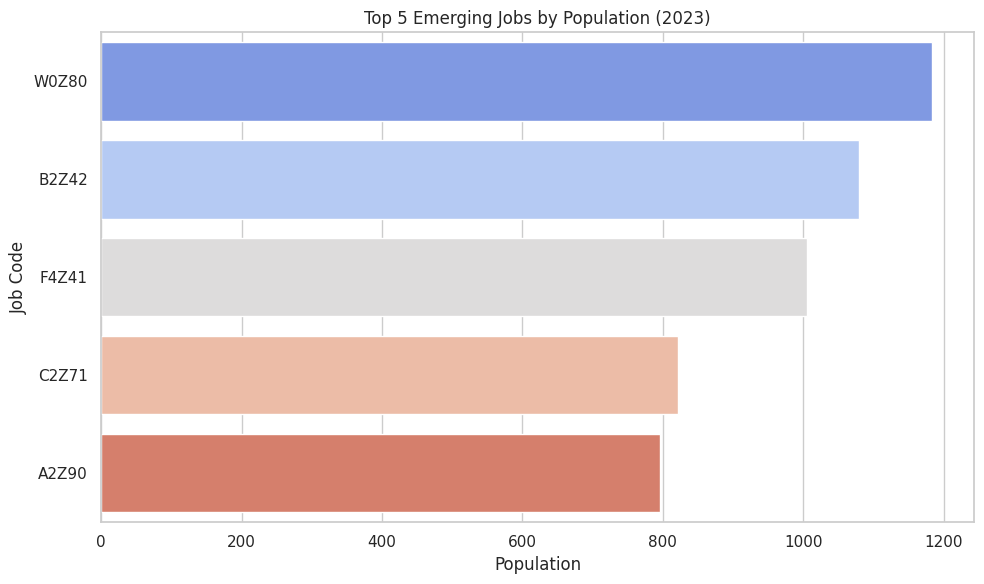

In [8]:
# Filter for emerging jobs in the most recent year (2023)
emerging_jobs_2023 = data[(data['date'] == 2023) & (data['is_emerging_job'] == True)]

# Identify top 5 emerging jobs based on population
top_emerging_jobs_2023 = emerging_jobs_2023.nlargest(5, 'rawpop')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='rawpop', y='job_code', data=top_emerging_jobs_2023, palette='coolwarm')
plt.title('Top 5 Emerging Jobs by Population (2023)')
plt.xlabel('Population')
plt.ylabel('Job Code')
plt.tight_layout()
plt.show()


The bar plot showcases the top 5 emerging jobs by population for the year 2023, identified by their job codes. This visualization highlights the most significant areas of job market growth within the emerging job sector for that year.

In [ ]:
The bar plot showcases the top 5 emerging jobs by population for the year 2023, identified by their job codes. This visualization highlights the most significant areas of job market growth within the emerging job sector for that year.